In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import earthpy as et
import fiona
import numpy as np
#fiona.supported_drivers

In [3]:
#%pip uninstall rtree

In [4]:
# sudo apt install libspatialindex-dev
#import getpass

#password = getpass.getpass()
#command = "sudo -S apt -y install libspatialindex-dev" # can be any command but don't forget -S as it enables input from stdin
#os.popen(command, 'w').write(password+'\n') 

In [5]:
#%pip install rtree

In [6]:
os.chdir(os.path.join(et.io.HOME, 'mahbub-dev/beuth_hochschule_for_technik_berlin/berlin_datathon_2021/data'))

In [7]:
count_parking_spots_estimated_kfz_path = os.path.join("Bezirksamt-20211120T113159Z-001", "Bezirksamt", "parking", "estimated_parking_spots_kfz.geojson")
df_count_parking_spots_estimated_kfz = gpd.read_file(count_parking_spots_estimated_kfz_path)
df_count_parking_spots_estimated_kfz = df_count_parking_spots_estimated_kfz.to_crs(4326)
df_count_parking_spots_estimated_kfz.dtypes

highway                 object
name                    object
parking                 object
orientation             object
position                object
capacity                object
source_orientation      object
source_position         object
source_capacity         object
geometry              geometry
dtype: object

In [8]:
df_count_parking_spots_estimated_kfz.head(6)

,highway,name,parking,orientation,position,capacity,source_orientation,source_position,source_capacity,geometry
0,secondary,Platz der Vereinten Nationen,lane,parallel,on_street,2,estimated,estimated,estimated,POINT (13.42975 52.52255)
1,secondary,Platz der Vereinten Nationen,lane,parallel,on_street,2,estimated,estimated,estimated,POINT (13.42976 52.52260)
2,secondary,Platz der Vereinten Nationen,lane,parallel,on_street,3,estimated,estimated,estimated,POINT (13.42979 52.52275)
3,secondary,Platz der Vereinten Nationen,lane,parallel,on_street,3,estimated,estimated,estimated,POINT (13.42979 52.52279)
4,secondary,Platz der Vereinten Nationen,lane,parallel,on_street,3,estimated,estimated,estimated,POINT (13.42980 52.52284)
5,tertiary,Thaerstraße,lane,parallel,on_street,19,estimated,estimated,estimated,POINT (13.45514 52.52148)


In [9]:
registered_cars_path = os.path.join("Bezirksamt-20211120T113159Z-001", "Bezirksamt", "demographics", "registered_cars.geojson")
df_registered_cars = gpd.read_file(registered_cars_path)
df_registered_cars = df_registered_cars.rename(columns={"district ": "district"})
df_registered_cars = df_registered_cars.to_crs(4326)
df_registered_cars.dtypes

district                           object
lor                                object
Bezirksregion                      object
Prognoseraum                       object
lor size in m²                    float64
inhabitants_total                   int64
of_those_inhabitants_18+            int64
vehicles_overall                    int64
cars_only                           int64
vehicles_per_1000_inhabitants       int64
cars_per_1000_inhabitants           int64
geometry                         geometry
dtype: object

In [10]:
df_registered_cars.head(6)

,district,lor,Bezirksregion,Prognoseraum,lor size in m²,inhabitants_total,of_those_inhabitants_18+,vehicles_overall,cars_only,vehicles_per_1000_inhabitants,cars_per_1000_inhabitants,geometry
0,Friedrichshain-Kreuzberg,Wrangelkiez,Südliche Luisenstadt,Kreuzberg Ost,526529.00,10979,9433,2375,1838,216,167,"POLYGON ((13.43206 52.49917, 13.43808 52.49721..."
1,Friedrichshain-Kreuzberg,Stralauer Kiez,Frankfurter Allee Süd FK,Friedrichshain Ost,1354726.79,7752,6739,4904,3621,632,467,"POLYGON ((13.44516 52.50113, 13.44597 52.50074..."
2,Friedrichshain-Kreuzberg,Wassertorplatz,Südliche Friedrichstadt,Kreuzberg Nord,388873.74,5065,4086,1113,908,219,179,"POLYGON ((13.39628 52.49795, 13.39663 52.49790..."
3,Friedrichshain-Kreuzberg,Oranienplatz,Nördliche Luisenstadt,Kreuzberg Ost,480676.24,8847,7537,2230,1694,252,191,"POLYGON ((13.41461 52.50468, 13.41465 52.50435..."
4,Friedrichshain-Kreuzberg,Mehringplatz,Südliche Friedrichstadt,Kreuzberg Nord,1036267.66,13833,11037,3904,3499,282,252,"POLYGON ((13.38576 52.50733, 13.38618 52.50654..."
5,Friedrichshain-Kreuzberg,Askanischer Platz,Südliche Friedrichstadt,Kreuzberg Nord,707419.20,6428,5395,2309,2113,359,328,"POLYGON ((13.37479 52.50326, 13.37471 52.50299..."


In [11]:
kfz_lor_planungsraum_path = os.path.join("neukoelln", "kfz_lor_planungsraum.geojson") # parking_way, parking_area
df_kfz_lor_planungsraum = gpd.read_file(kfz_lor_planungsraum_path)
#Planungsraum = lor
df_kfz_lor_planungsraum = df_kfz_lor_planungsraum.rename(columns={"Bezirk": "district", "Planungsraum": "lor", "Flächengröße in m²": "lor size in m²", "Einwohner insgesamt": "inhabitants_total", "darunter 18 Jahre und älter": "of_those_inhabitants_18+", "Kraftfahrzeuge insgesamt": "vehicles_overall", "darunter Pkw": "cars_only", "Kfz pro 1000 EW": "vehicles_per_1000_inhabitants", "Pkw pro 1000 EW": "cars_per_1000_inhabitants"})
df_kfz_lor_planungsraum.dtypes

Schlüssel                          object
district                           object
lor                                object
Bezirksregion                      object
Prognoseraum                       object
lor size in m²                    float64
inhabitants_total                   int64
of_those_inhabitants_18+            int64
vehicles_overall                    int64
cars_only                           int64
vehicles_per_1000_inhabitants       int64
cars_per_1000_inhabitants           int64
geometry                         geometry
dtype: object

In [12]:
df_kfz_lor_planungsraum.head(6)

,Schlüssel,district,lor,Bezirksregion,Prognoseraum,lor size in m²,inhabitants_total,of_those_inhabitants_18+,vehicles_overall,cars_only,vehicles_per_1000_inhabitants,cars_per_1000_inhabitants,geometry
0,10010310,Marzahn-Hellersdorf,Alt-Marzahn,Marzahn Süd,Marzahn,2238368.26,18290,15454,7132,6457,389,353,"POLYGON ((13.53692 52.53470, 13.53739 52.53467..."
1,10010101,Marzahn-Hellersdorf,Marzahn West,Marzahn Nord,Marzahn,694985.47,5676,4528,1959,1783,345,314,"POLYGON ((13.54462 52.56693, 13.54471 52.56694..."
2,10010206,Marzahn-Hellersdorf,Ringkolonnaden,Marzahn Mitte,Marzahn,1486009.41,17341,14565,5947,5387,342,310,"POLYGON ((13.54802 52.55098, 13.54883 52.55074..."
3,10010204,Marzahn-Hellersdorf,Wuhletalstraße,Marzahn Mitte,Marzahn,845563.37,10622,8488,3439,3174,323,298,"POLYGON ((13.55390 52.55776, 13.55476 52.55748..."
4,10010102,Marzahn-Hellersdorf,Havemannstraße,Marzahn Nord,Marzahn,1898742.52,18508,14659,5514,5090,297,275,"POLYGON ((13.55825 52.56300, 13.55882 52.56279..."
5,10010311,Marzahn-Hellersdorf,Landsberger Tor,Marzahn Süd,Marzahn,1608201.44,3694,3028,1634,1469,442,397,"POLYGON ((13.58610 52.54937, 13.58616 52.54943..."


In [13]:
#df_district_neukölln = df_kfz_lor_planungsraum.query("Bezirk == 'Neukölln'")
df_district_neukölln = df_kfz_lor_planungsraum.query("district == 'Neukölln'")
df_district_neukölln.dtypes

Schlüssel                          object
district                           object
lor                                object
Bezirksregion                      object
Prognoseraum                       object
lor size in m²                    float64
inhabitants_total                   int64
of_those_inhabitants_18+            int64
vehicles_overall                    int64
cars_only                           int64
vehicles_per_1000_inhabitants       int64
cars_per_1000_inhabitants           int64
geometry                         geometry
dtype: object

In [14]:
df_district_neukölln.sample(6)

,Schlüssel,district,lor,Bezirksregion,Prognoseraum,lor size in m²,inhabitants_total,of_those_inhabitants_18+,vehicles_overall,cars_only,vehicles_per_1000_inhabitants,cars_per_1000_inhabitants,geometry
207,08010115,Neukölln,Hasenheide,Schillerpromenade,Neukölln,1424399.99,938,792,292,222,311,236,"POLYGON ((13.40639 52.48277, 13.40635 52.48247..."
121,08030830,Neukölln,Gropiusstadt Süd,Gropiusstadt,Gropiusstadt,676876.83,7279,6333,2442,2195,335,301,"POLYGON ((13.44543 52.42662, 13.44568 52.42635..."
204,08010118,Neukölln,Silbersteinstraße,Schillerpromenade,Neukölln,857648.77,12044,10015,2102,1762,174,146,"POLYGON ((13.41989 52.47208, 13.41991 52.47205..."
123,08041035,Neukölln,Blumenviertel,Rudow,Buckow Nord/Rudow,2118705.02,8288,6902,5214,4297,629,518,"POLYGON ((13.46895 52.43460, 13.46946 52.43433..."
219,08010116,Neukölln,Wissmannstraße,Schillerpromenade,Neukölln,165198.96,3614,3137,695,585,192,161,"POLYGON ((13.42081 52.48043, 13.42125 52.48047..."
216,08010405,Neukölln,Hertzbergplatz,Rixdorf,Neukölln,398953.06,8894,7656,1845,1535,207,172,"POLYGON ((13.44038 52.48175, 13.44137 52.48126..."


In [15]:
parking_way_path = os.path.join("neukoelln", "parking_way.geojson") # parking_way, parking_area
df_parking_way = gpd.read_file(parking_way_path)
df_parking_way = df_parking_way.rename(columns = {"highway:name": "name", "source:capacity": "source_capacity"})
df_parking_way.dtypes

condition                 object
parking                   object
orientation               object
condition:other           object
position                  object
condition:other:time      object
source_capacity           object
oneway_direction          object
highway                   object
name                      object
maxstay                   object
capacity                   int64
osm-location              object
osm_id                    object
id                         int64
length                   float64
geometry                geometry
dtype: object

In [16]:
df_parking_way.head(6)

,condition,parking,orientation,condition:other,position,condition:other:time,source_capacity,oneway_direction,highway,name,maxstay,capacity,osm-location,osm_id,id,length,geometry
0,free,street_side,perpendicular,None,street_side,None,OSM,None,residential,Schaffhausener Straße,None,38,separate,way/37722270,1,90.389,"LINESTRING (13.41520 52.46092, 13.41389 52.46107)"
1,free,street_side,parallel,None,street_side,None,estimated,None,residential,Körtestraße,None,6,separate,way/851610744,2,31.143,"LINESTRING (13.41283 52.49142, 13.41240 52.49152)"
2,free,street_side,diagonal,None,street_side,None,OSM,None,tertiary,Wiener Straße,None,40,separate,way/554762162,3,111.645,"LINESTRING (13.43235 52.49734, 13.43379 52.49685)"
3,free,street_side,diagonal,None,street_side,None,OSM,None,tertiary,Wiener Straße,None,6,separate,way/554762163,4,20.422,"LINESTRING (13.43490 52.49647, 13.43516 52.49638)"
4,free,street_side,perpendicular,no,street_side,Apr-Sep: We 14:00-18:00,OSM,None,living_street,Böckhstraße,None,3,separate,way/867318940,5,6.762,"LINESTRING (13.41570 52.49460, 13.41579 52.49458)"
5,free,street_side,perpendicular,no,street_side,Apr-Sep: We 14:00-18:00,OSM,None,living_street,Böckhstraße,None,4,separate,way/867318940,6,8.970,"LINESTRING (13.41611 52.49450, 13.41623 52.49447)"


In [17]:
parking_spots_columns = ["highway", "name", "parking", "orientation", "position", "capacity", "source_capacity", "geometry"]
df_parking_spots_kfz_neukölln = pd.concat([df_count_parking_spots_estimated_kfz[parking_spots_columns], df_parking_way[parking_spots_columns]], ignore_index=True)
df_parking_spots_kfz_neukölln.shape

(75296, 8)

In [18]:
lor_columns = ['district', 'lor', 'Bezirksregion', 'Prognoseraum', 'lor size in m²', 'inhabitants_total', 'of_those_inhabitants_18+', 'vehicles_overall', 'cars_only', 'vehicles_per_1000_inhabitants', 'cars_per_1000_inhabitants', 'geometry']
df_lor_kfz_neukölln = pd.concat([df_registered_cars[lor_columns], df_district_neukölln[lor_columns]], ignore_index=True)
df_lor_kfz_neukölln["lor_geometry"] = df_lor_kfz_neukölln["geometry"] 
df_lor_kfz_neukölln.shape

(66, 13)

In [19]:
# Make a spatial join
df_kfz_neukölln = gpd.sjoin(df_parking_spots_kfz_neukölln, df_lor_kfz_neukölln, how="inner", predicate="within")
df_kfz_neukölln.shape

(71431, 21)

In [20]:
df_kfz_neukölln.sample(6)

,highway,name,parking,orientation,position,capacity,source_capacity,geometry,index_right,district,...,Bezirksregion,Prognoseraum,lor size in m²,inhabitants_total,of_those_inhabitants_18+,vehicles_overall,cars_only,vehicles_per_1000_inhabitants,cars_per_1000_inhabitants,lor_geometry
33572,secondary,Köpenicker Straße,lane,parallel,on_street,5,estimated,POINT (13.42999 52.50654),6,Friedrichshain-Kreuzberg,...,Nördliche Luisenstadt,Kreuzberg Ost,821854.35,13033,11034,3271,2584,250,198,"POLYGON ((13.42252 52.49895, 13.42475 52.49897..."
69211,residential,Hildegard-Jadamowitz-Straße,lane,parallel,on_street,56,estimated,POINT (13.44587 52.51600),11,Friedrichshain-Kreuzberg,...,Karl-Marx-Allee Süd,Friedrichshain West,541410.67,11200,9787,2965,2494,264,222,"POLYGON ((13.43990 52.51397, 13.44068 52.51352..."
42786,residential,Methfesselstraße,lane,parallel,on_street,11,estimated,POINT (13.38438 52.48753),25,Friedrichshain-Kreuzberg,...,Tempelhofer Vorstadt,Kreuzberg Süd,742969.72,10900,9207,3116,2546,285,233,"POLYGON ((13.37157 52.48495, 13.37193 52.48495..."
13887,residential,Methfesselstraße,lane,parallel,on_street,44,estimated,POINT (13.38439 52.48730),25,Friedrichshain-Kreuzberg,...,Tempelhofer Vorstadt,Kreuzberg Süd,742969.72,10900,9207,3116,2546,285,233,"POLYGON ((13.37157 52.48495, 13.37193 52.48495..."
36830,tertiary,Eldenaer Straße,lane,parallel,on_street,38,estimated,POINT (13.46554 52.52001),13,Friedrichshain-Kreuzberg,...,Frankfurter Allee Nord,Friedrichshain Ost,969832.32,22040,18632,5188,4110,235,186,"POLYGON ((13.45247 52.51869, 13.45231 52.51848..."
7184,residential,Jungstraße,lane,parallel,on_street,46,estimated,POINT (13.46534 52.51102),10,Friedrichshain-Kreuzberg,...,Frankfurter Allee Süd FK,Friedrichshain Ost,783421.41,20669,17625,4082,3301,197,159,"POLYGON ((13.45289 52.51421, 13.45363 52.51400..."


In [21]:
df_kfz_neukölln.dtypes

highway                            object
name                               object
parking                            object
orientation                        object
position                           object
capacity                           object
source_capacity                    object
geometry                         geometry
index_right                         int64
district                           object
lor                                object
Bezirksregion                      object
Prognoseraum                       object
lor size in m²                    float64
inhabitants_total                   int64
of_those_inhabitants_18+            int64
vehicles_overall                    int64
cars_only                           int64
vehicles_per_1000_inhabitants       int64
cars_per_1000_inhabitants           int64
lor_geometry                     geometry
dtype: object

In [22]:
# lor geometry
df_kfz_neukölln["lor_geometry"]

0        POLYGON ((13.42657 52.51927, 13.42670 52.51924...
1        POLYGON ((13.42657 52.51927, 13.42670 52.51924...
2        POLYGON ((13.42657 52.51927, 13.42670 52.51924...
3        POLYGON ((13.42657 52.51927, 13.42670 52.51924...
4        POLYGON ((13.42657 52.51927, 13.42670 52.51924...
                               ...                        
74282    POLYGON ((13.45227 52.48109, 13.45205 52.48092...
74283    POLYGON ((13.45227 52.48109, 13.45205 52.48092...
74509    POLYGON ((13.45227 52.48109, 13.45205 52.48092...
74743    POLYGON ((13.45227 52.48109, 13.45205 52.48092...
74744    POLYGON ((13.45227 52.48109, 13.45205 52.48092...
Name: lor_geometry, Length: 71431, dtype: geometry

In [23]:
# parking spots geometry
df_kfz_neukölln["geometry"]

0                                POINT (13.42975 52.52255)
1                                POINT (13.42976 52.52260)
2                                POINT (13.42979 52.52275)
3                                POINT (13.42979 52.52279)
4                                POINT (13.42980 52.52284)
                               ...                        
74282    LINESTRING (13.45327 52.47919, 13.45365 52.47947)
74283    LINESTRING (13.45374 52.47954, 13.45382 52.479...
74509    LINESTRING (13.45134 52.47970, 13.45080 52.47998)
74743    LINESTRING (13.45392 52.47975, 13.45381 52.479...
74744    LINESTRING (13.45490 52.47925, 13.45477 52.479...
Name: geometry, Length: 71431, dtype: geometry

<AxesSubplot:>

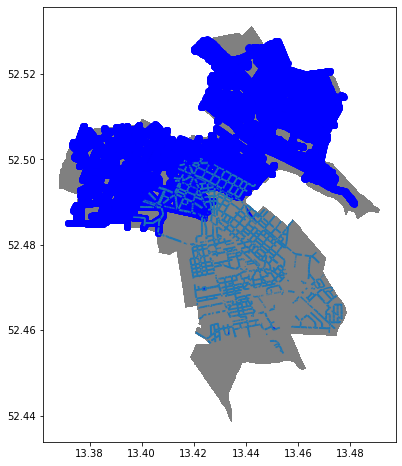

In [32]:
# Create plot
ax = df_kfz_neukölln["lor_geometry"].plot(facecolor='gray', figsize=(8, 8))
df_kfz_neukölln["geometry"].plot(ax=ax, facecolor='blue', figsize=(8, 8))

In [25]:
# save to a file for further data preparation, modeling and other purposes
#kfz_neukölln_path = os.path.join("kfz_neukölln.csv")
#df_kfz_neukölln.to_csv(kfz_neukölln_path, index=False) 

In [26]:
#%pip install geoplot
#%pip install imageio
#%pip install pathlib
#%pip install mapclassify

In [27]:
df_kfz_neukölln.query("name == 'Markgrafenstraße' and capacity == 6")[["lor", "name", "capacity", "lor size in m²", "inhabitants_total", "vehicles_overall", "geometry", "lor_geometry"]]

,lor,name,capacity,lor size in m²,inhabitants_total,vehicles_overall,geometry,lor_geometry


In [28]:
filter_columns = ["lor", "name", "capacity", "highway", "parking", "orientation", "position", "district", 
                  "Bezirksregion", "Prognoseraum", "lor size in m²", "inhabitants_total", "of_those_inhabitants_18+", 
                  "vehicles_overall", "cars_only", "vehicles_per_1000_inhabitants", "cars_per_1000_inhabitants",
                  "lor_geometry"]
df_kfz_neukölln_02 = df_kfz_neukölln.groupby(by=["name", "capacity"])[filter_columns].first()
df_kfz_neukölln_02 = df_kfz_neukölln_02.rename(columns = {"lor_geometry": "geometry", "source:capacity": "source_capacity"})
df_kfz_neukölln_02["capacity"] = pd.to_numeric(df_kfz_neukölln_02["capacity"])
df_kfz_neukölln_02.dtypes

lor                                object
name                               object
capacity                            int64
highway                            object
parking                            object
orientation                        object
position                           object
district                           object
Bezirksregion                      object
Prognoseraum                       object
lor size in m²                    float64
inhabitants_total                   int64
of_those_inhabitants_18+            int64
vehicles_overall                    int64
cars_only                           int64
vehicles_per_1000_inhabitants       int64
cars_per_1000_inhabitants           int64
geometry                         geometry
dtype: object

In [29]:
# save to a file for further data preparation, modeling and other purposes
#kfz_neukölln_02_path = os.path.join("kfz_neukölln_02.csv")
#df_kfz_neukölln_02.to_csv(kfz_neukölln_02_path, index=False) 

In [30]:
df_kfz_neukölln_02.head(6)

lor            name  capacity   highway  \
name           capacity                                                     
Adalbertstraße 11        Oranienplatz  Adalbertstraße        11  tertiary   
               15        Oranienplatz  Adalbertstraße        15  tertiary   
               16        Oranienplatz  Adalbertstraße        16  tertiary   
               17        Oranienplatz  Adalbertstraße        17  tertiary   
               18        Oranienplatz  Adalbertstraße        18  tertiary   
               2         Oranienplatz  Adalbertstraße         2  tertiary   

                        parking orientation   position  \
name           capacity                                  
Adalbertstraße 11          lane    parallel  on_street   
               15          lane    parallel  on_street   
               16          lane    parallel  on_street   
               17          lane    parallel  on_street   
               18          lane    parallel  on_street   
               2           lane    parallel  on_street   

                                         district          Bezirksregion  \
name           capacity                                                    
Adalbertstraße 11        Friedrichshain-Kreuzberg  Nördliche Luisenstadt   
               15        Friedrichshain-Kreuzberg  Nördliche Luisenstadt   
               16        Friedrichshain-Kreuzberg  Nördliche Luisenstadt   
               17        Friedrichshain-Kreuzberg  Nördliche Luisenstadt   
               18        Friedrichshain-Kreuzberg  Nördliche Luisenstadt   
               2         Friedrichshain-Kreuzberg  Nördliche Luisenstadt   

                          Prognoseraum  lor size in m²  inhabitants_total  \
name           capacity                                                     
Adalbertstraße 11        Kreuzberg Ost       480676.24               8847   
               15        Kreuzberg Ost       480676.24               8847   
               16        Kreuzberg Ost       480676.24               8847   
               17        Kreuzberg Ost       480676.24               8847   
               18        Kreuzberg Ost       480676.24               8847   
               2         Kreuzberg Ost       480676.24               8847   

                         of_those_inhabitants_18+  vehicles_overall  \
name           capacity                                               
Adalbertstraße 11                            7537              2230   
               15                            7537              2230   
               16                            7537              2230   
               17                            7537              2230   
               18                            7537              2230   
               2                             7537              2230   

                         cars_only  vehicles_per_1000_inhabitants  \
name           capacity                                             
Adalbertstraße 11             1694                            252   
               15             1694                            252   
               16             1694                            252   
               17             1694                            252   
               18             1694                            252   
               2              1694                            252   

                         cars_per_1000_inhabitants  \
name           capacity                              
Adalbertstraße 11                              191   
               15                              191   
               16                              191   
               17                              191   
               18                              191   
               2                               191   

                                                                  geometry  
name           capacity                                                     
Adalbertstraße 11